In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", header=None)
df[len(df.columns)] = 0.0
df.loc[df.iloc[:,1] == 'M', len(df.columns) - 1 ] = 1
df.drop([0, 1], axis=1, inplace=True)
df.columns = range(len(df.columns))
benin_set = df.loc[df.iloc[:,-1] == 0, 0:29]
malin_set = df.loc[df.iloc[:,-1] == 1, 0:29]

In [31]:
data = df.to_numpy()
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [32]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        1.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        1.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        1.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        1.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        1.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        0.000e+00]])

In [35]:
(1.038e+01 - 19.289649) / 4.301036

-2.0715123054073485

In [34]:
mean = df.describe().loc["mean",:len(df.columns)-2].to_numpy()
std = df.describe().loc["std",:len(df.columns)-2].to_numpy()
data[:, :-1] = (data[:, :-1] - mean) / std
data

array([[ 1.09609953, -2.0715123 ,  1.26881726, ...,  2.74820411,
         1.93531174,  1.        ],
       [ 1.82821197, -0.35332152,  1.68447255, ..., -0.24367526,
         0.28094279,  1.        ],
       [ 1.5784992 ,  0.45578591,  1.56512598, ...,  1.15124203,
         0.20121416,  1.        ],
       ...,
       [ 0.70166686,  2.04377549,  0.67208442, ..., -1.10357792,
        -0.31812924,  1.        ],
       [ 1.83672491,  2.33440316,  1.98078127, ...,  1.9173959 ,
         2.21768395,  1.        ],
       [-1.80681144,  1.22071793, -1.81279344, ..., -0.04809589,
        -0.75054629,  0.        ]])

# Historgram

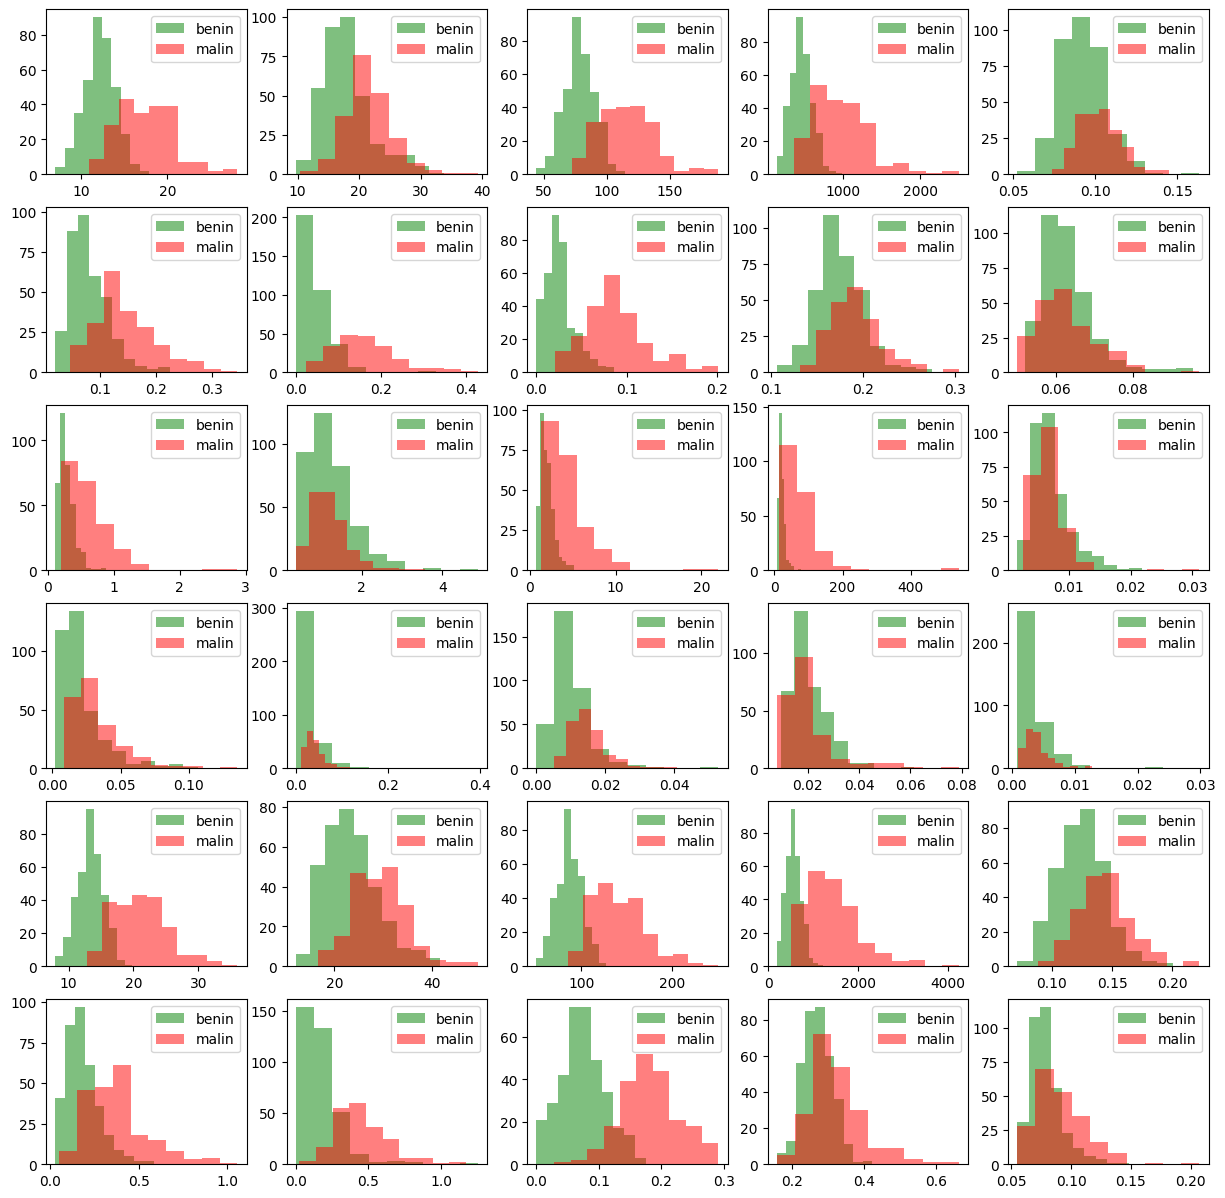

In [4]:
nb_col_graph = 5
nb_lignes_graph = 6
col_names = benin_set.columns
plt.figure(figsize=(15, 15))
for i in range(len(col_names)):
    plt.subplot(nb_lignes_graph, nb_col_graph, i + 1)
    plt.hist(benin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="benin", color="g")
    plt.hist(malin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="malin", color="r")
    plt.legend()
manager = plt.get_current_fig_manager()
manager.set_window_title("Histogram")
plt.show()

On remarque que les features n'ont pas toutes le meme ordre de grandeur et doivent donc etre normalisees. 

# Scatter

# Normalisation

